In [1]:
import numpy as np
from vww.data import *
from scipy.special import softmax

import tensorflow as tf


In [2]:
import vww.exec_data_last as exec_data
image_to_use = exec_data.input_image
image_to_use = image_to_use.astype(np.int8)

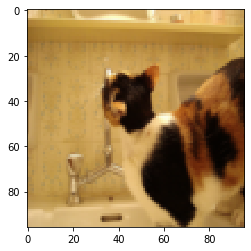

In [3]:
from matplotlib import pyplot as plt
plt.imshow(image_to_use + 128, interpolation='nearest')
plt.show()

In [4]:
from parser import simulate
runtime_order, cache, name_to_layer = simulate("../../v0.1/training/visual_wake_words/trained_models/vww_96_int8.tflite", image_to_use)

zero points fc 0 -5


In [5]:
tflite_model_path = "../../v0.1/training/visual_wake_words/trained_models/vww_96_int8.tflite"
# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
# Get details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [6]:
from tensorflow.lite.python import interpreter as interpreter_wrapper
import tflite.Model

import flatbuffers
def OutputsOffset(self, j):
    o = flatbuffers.number_types.UOffsetTFlags.py_type(self._tab.Offset(8))
    if o != 0:
        a = self._tab.Vector(o)
        return a + flatbuffers.number_types.UOffsetTFlags.py_type(j * 4)
    return 0

def buffer_change_output_tensor_to(model_buffer, new_tensor_i):
    # Reads model_buffer as a proper flatbuffer file and gets the offset programatically
    # It might be much more efficient if Model.subgraphs[0].outputs[] was set to a list of all the tensor indices.
    fb_model_root = tflite.Model.GetRootAsModel(model_buffer, 0)
    output_tensor_index_offset = OutputsOffset(fb_model_root.Subgraphs(0), 0) # Custom added function to return the file offset to this vector

    # Flatbuffer scalars are stored in little-endian.
    new_tensor_i_bytes = bytes([
        new_tensor_i & 0x000000FF, \
        (new_tensor_i & 0x0000FF00) >> 8, \
        (new_tensor_i & 0x00FF0000) >> 16, \
        (new_tensor_i & 0xFF000000) >> 24 \
    ])
    # Replace the 4 bytes corresponding to the first output tensor index
    return model_buffer[:output_tensor_index_offset] + new_tensor_i_bytes + model_buffer[output_tensor_index_offset + 4:]

model_buffer = None
with open(tflite_model_path, 'rb') as f:
    model_buffer = f.read()

ind = 0

outs = {}

try:
    while True:
        # Change output tensor
        model_buffer = buffer_change_output_tensor_to(model_buffer, ind)
        interpreter = interpreter_wrapper.Interpreter(model_content=model_buffer)
        interpreter.allocate_tensors()
        interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image_to_use, axis=0))
        # Run inference on the input data up until the output tensor is calculated
        interpreter.invoke()

        dets = interpreter._get_tensor_details(ind)
        tens = interpreter.get_tensor(ind)
        outs[dets["name"]] = tens.astype(np.int32)

        ind += 1
except:
    pass

In [7]:
mapping = []

layer_to_name = { id(value[0]): key.decode("utf-8") for key, value in name_to_layer.items() }

for layer in runtime_order:
    mapping.append((0, cache[id(layer)], outs[layer_to_name[id(layer)]]))

out_1
tflite, sim, gemmini
0 0.3345269097222222 157.26220703125
0 1 255


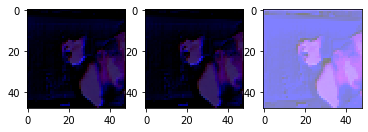

out_2
tflite, sim, gemmini
0 0.4364691840277778 133.3125
0 5 228


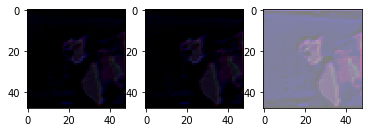

out_3
tflite, sim, gemmini
0 0.7832302517361112 133.79890950520834
0 9 249


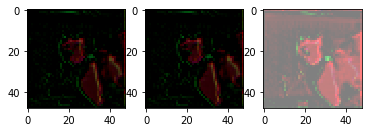

out_4
tflite, sim, gemmini
0 1.6643880208333333 139.62228732638889
0 14 255


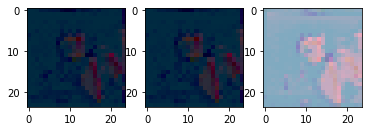

out_5
tflite, sim, gemmini
0 1.3926866319444444 135.65071614583334
0 12 255


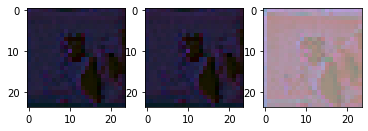

out_6
tflite, sim, gemmini
0 1.1398111979166667 131.05691189236111
0 18 255


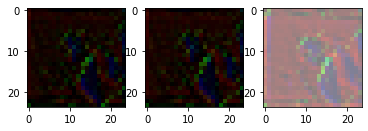

out_7
tflite, sim, gemmini
0 1.4141167534722223 130.06803385416666
0 18 255


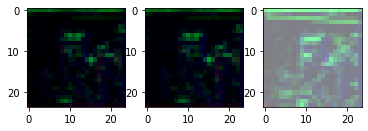

out_8
tflite, sim, gemmini
0 2.372829861111111 131.02452256944446
0 20 255


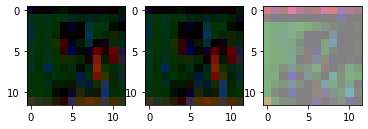

out_9
tflite, sim, gemmini
0 2.0569661458333335 130.03656684027777
0 25 255


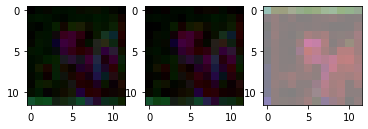

out_10
tflite, sim, gemmini
0 1.6691623263888888 128.75607638888889
0 31 255


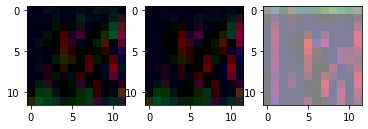

out_11
tflite, sim, gemmini
0 2.1102430555555554 128.83029513888889
0 43 255


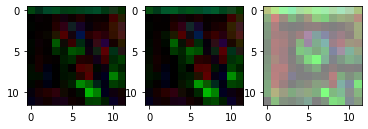

out_12
tflite, sim, gemmini
0 2.3059895833333335 127.25434027777777
0 24 255


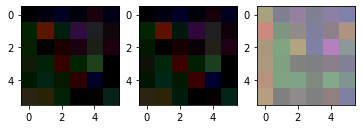

out_13
tflite, sim, gemmini
0 2.4505208333333335 125.82486979166667
0 29 255


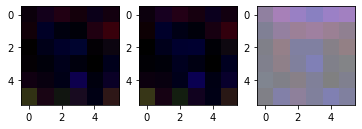

out_14
tflite, sim, gemmini
0 1.7786458333333333 126.66493055555556
0 32 255


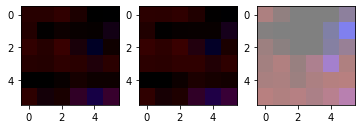

out_15
tflite, sim, gemmini
0 1.5047743055555556 126.07964409722223
0 34 255


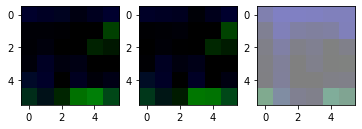

out_16
tflite, sim, gemmini
0 0.7543402777777778 126.76801215277777
0 29 218


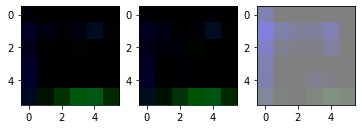

out_17
tflite, sim, gemmini
0 0.5479600694444444 127.96809895833333
0 32 224


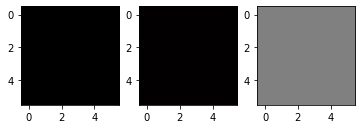

out_18
tflite, sim, gemmini
0 0.4329427083333333 127.64127604166667
0 35 214


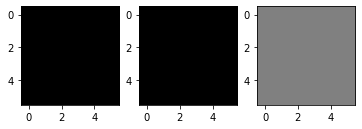

out_19
tflite, sim, gemmini
0 0.525390625 127.85091145833333
0 26 219


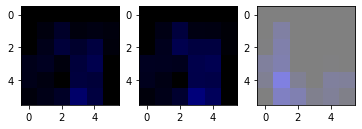

out_20
tflite, sim, gemmini
0 0.18424479166666666 127.89735243055556
0 23 210


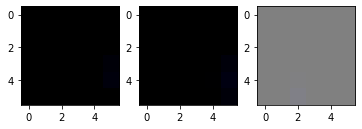

out_21
tflite, sim, gemmini
0 0.5128038194444444 128.01714409722223
0 24 248


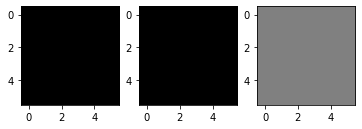

out_22
tflite, sim, gemmini
0 0.19053819444444445 127.62521701388889
0 20 212


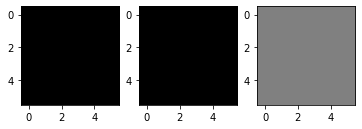

out_23
tflite, sim, gemmini
0 0.6918402777777778 128.140625
0 17 255


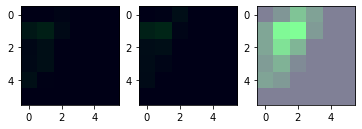

out_24
tflite, sim, gemmini
0 0.5095486111111112 127.65798611111111
0 26 255


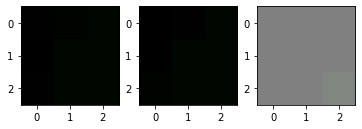

out_25
tflite, sim, gemmini
0 0.48828125 128.11545138888889
0 31 222


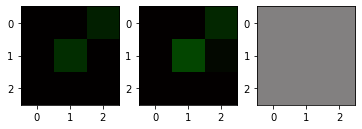

out_26
tflite, sim, gemmini
0 0.24696180555555555 127.86458333333333
0 28 249


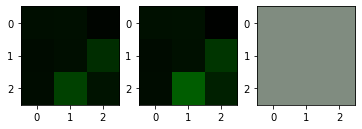

out_27
tflite, sim, gemmini
0 0.1909722222222222 127.96701388888889
0 29 242


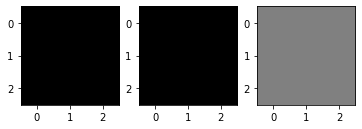

out_28
tflite, sim, gemmini
0 0.203125 127.9609375
0 6 145


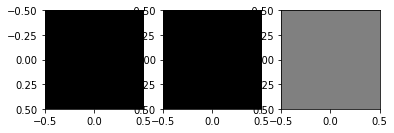

out_29
tflite, sim, gemmini
0 0.203125 127.17578125
0 6 128
[[-128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -122
  -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -128 -128 -128 -121 -128 -128 -123 -128 -128 -128 -128
  -128 -124 -128 -128 -128 -128 -128 -128 -123 -128 -128 -128 -128 -128
  -107 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -114 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -116 -128 -128 -128 -128 -128 -128 -128 -113 -128 -128
  -128 -122 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -114 -128 -128 -128 -128 -128 -118 -128 -128 -128 -128
  -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128
  -128 -128 -128 -128 -128 -128 -128 -128 -128 -121 -128 -128 -128 -128
  -1

In [9]:
import sys
np.set_printoptions(threshold=sys.maxsize)
for i, (gemm, us, them) in enumerate(mapping):
    try:
        gemm = getattr(exec_data, f"output_{i + 1}")
    except:
        gemm = 0
    print(f"out_{i + 1}")
    print("tflite, sim, gemmini")
    if len(us.shape) == 3:
        print(0, np.average(np.abs(them[0,:,:,:] - us)), np.average(np.abs(them[0,:,:,:] - gemm)))
        print(0, np.max(np.abs(them[0,:,:,:] - us)), np.max(np.abs(them[0,:,:,:] - gemm)))
        f, axarr = plt.subplots(1,3)
        axarr[0].imshow(them[0,:,:,:3] + 128, interpolation='nearest')
        axarr[1].imshow(us[:,:,:3] + 128, interpolation='nearest')
        axarr[2].imshow(gemm[:,:,:3] + 128, interpolation='nearest')
        plt.show()
    else:
        print(0, np.average(np.abs(them[0,:] - us)), np.average(np.abs(them[0,:] - gemm)))
        print(0, np.max(np.abs(them[0,:] - us)), np.max(np.abs(them[0,:] - gemm)))
        print(them)
        print(us)
        print(gemm)